# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [117]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [118]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [119]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [120]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [121]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [122]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [123]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [124]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [125]:
project_data.head(200)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",I will design different clues using specific c...,Donations to this project will immediately imp...,"My students need items from a \""Breakout Box\""...",6,1,Math_Science History_Civics,Mathematics SocialSciences,It's the end of the school year. Routines have...
23374,72317,p087808,598621c141cda5fb184ee7e8ccdd3fcc,Ms.,CA,2016-04-27 02:04:15,Grades PreK-2,iPad for Learners,Never has society so rapidly changed. Technolo...,Our Language Arts and Social Justice Magnet Sc...,"\""Is it my turn, Ms. K? When am I going to be ...","By donating to this project, you will give my ...",My students need 1 ipad mini.,127,1,Literacy_Language,ESL Literacy,Never has society so rapidly changed. Technolo...
49228,57854,p099430,4000cfe0c8b2df75a218347c1765e283,Ms.,IL,2016-04-27 07:19:44,Grades PreK-2,A flexible classroom for flexible minds!,My students yearn for a classroom environment ...,I have the privilege of teaching an incredible...,"Ideally, I would love to delve right into \""fl...",This project will be so beneficial for my stud...,My students need 5 Hokki Stools and an easel o...,1,1,Literacy_Language,Literacy,My students yearn for a classroom environment ...
7176,79341,p091436,bb2599c4a114d211b3381abe9f899bf8,Mrs.,OH,2016-04-27 07:24:47,Grades PreK-2,Robots are Taking over 2nd Grade,"Computer coding and robotics, my second grader...","We are a small, rural school in Northwest Ohio...",We have a new technology teacher to our distri...,You can help this dream of ours become a reali...,My students need a robot mouse STEM activity s...,72,1,Math_Science AppliedLearning,AppliedSciences EarlyDevelopment,"Computer coding and robotics, my second grader..."
35006,149397,p131036,bf5bf59287e7c676a634a00284596b64,Mrs.,FL,2016-04-27 08:42:52,Grades 3-5,Help us travel the world...VIRTUALLY!,"We LOVE technology! In our classroom, technolo...","I have 50 bright, hard-working, technology-mot...",The ability to place one virtual reality devic...,By allowing my students the opportunity to tak...,My students need virtual reality viewers to ho...,2,0,History_Civics Literacy_Language,History_Geography Literature_Writing,"We LOVE technology! In our classroom, technolo..."
5145,50256,p203475,63e9a9f2c9811a247f1aa32ee6f92644,Mrs.,CA,2016-04-27 08:45:34,Grades 3-5,Books to Power Powerful Book Clubs!,Do you remember the book you read that made yo...,My students are part of an exciting adventure....,"We are fortunate enough to be a \""project scho...",As a new teacher my book shelves are bare or t...,My students need books to hel

In [126]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [127]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [128]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [129]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [130]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [131]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [132]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [133]:
# Combining all the above stundents 
from tqdm import tqdm
import num2words
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████| 50000/50000 [00:57<00:00, 864.33it/s]


In [134]:
# after preprocesing
preprocessed_essays[4]

'students yearn classroom environment matches desire learn education changing daily need classroom meet needs first graders privilege teaching incredible group six seven year olds absolutely love learn completely blown away love learning day new adventure enjoy learning nonfiction text hands activities many students active learners benefit kinesthetic activities sometimes learning sitting seat difficult want every child opportunity focus energy order best school ideally would love delve right flexible seating students provided many different seating options chairs hokki stools mats ground etc freedom choose ever seat feel need student would able choose seating option best help learn addition pencil sharpener mobile easel magnetic strips mounting tape help make classroom better suited six seven year olds project beneficial students able better focus energy something small choosing seat help encourage positive learning environment promotes learning students easel help make classroom mobi

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [135]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
#Replacing number with text https://stackoverflow.com/questions/40040177/search-and-replace-numbers-with-words-in-file
#re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|█████████████████████████████████| 50000/50000 [00:02<00:00, 18772.16it/s]


In [136]:
#process project grade remove replace space with _ and replace - with _
preprocessed_grade = []
for sentance in  tqdm(project_data['project_grade_category'].values):
    sentance=sentance.replace(" ","_")
    sentance = sentance.replace("-","_")
    preprocessed_grade.append(sentance)
list(set(preprocessed_grade))

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 675211.21it/s]


['Grades_PreK_2', 'Grades_3_5', 'Grades_9_12', 'Grades_6_8']

<h2><font color='red'> 1.4.1 Combining Resource data and project data`</font></h2>

In [137]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
print(project_data.columns)
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(project_data.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')


<h2><font color='red'>[1.4.2] Splitting data into Train and cross validation(or test): Stratified Sampling</font></h2>

In [138]:
# train test split
y_label= project_data['project_is_approved']
project_data['essay'] = preprocessed_essays
project_data['project_title']= preprocessed_title
project_data['project_grade_category']=preprocessed_grade
X_label = project_data.drop(columns='project_is_approved')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.33, stratify=y_label)


In [139]:
print(X_train.shape)
print(X_test.shape)
#print(X_cv.shape)

(33500, 19)
(16500, 19)


In [140]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'],
      dtype='object')

## 1.5 Preparing data for models

In [141]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2><font color='red'>[1.5.1] Vectorizing Categorical data</font></h2>

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [142]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohc = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohc = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohc = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohc.shape, y_train.shape)
#print(X_cv_categories_ohc.shape, y_cv.shape)
print(X_test_categories_ohc.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [143]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_categories_ohc = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_sub_categories_ohc = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_ohc = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_categories_ohc.shape, y_train.shape)
#print(X_cv_sub_categories_ohc.shape, y_cv.shape)
print(X_test_sub_categories_ohc.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [144]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [145]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 6) (33500,)
(16500, 6) (16500,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


In [146]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [147]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#BoW
preprocessed_essays =X_train['essay'].astype('U')
count_vect = CountVectorizer(min_df=10) #in scikit-learn
count_vect.fit(preprocessed_essays)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

x_essay_bow1 = count_vect.transform(preprocessed_essays.astype('U'))
#cv_essay_bow1 = count_vect.transform(X_cv['essay'].astype('U'))
essay_bow1 = count_vect.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_bow1))
print("the shape of out text BOW vectorizer ",essay_bow1.get_shape())
print("the number of unique words ", essay_bow1.get_shape()[1])


#Normalization of BOW
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_bow1)

x_essay_bow = w_normalized.transform(x_essay_bow1)
#cv_essay_bow = w_normalized.transform(cv_essay_bow1)
essay_bow = w_normalized.transform(essay_bow1)

some feature names  ['ab', 'abandoned', 'abc', 'abcmouse', 'abcs', 'abcya', 'abdominal', 'abilities', 'ability', 'able']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (16500, 10190)
the number of unique words  10190


In [148]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
preprocessed_title =X_train['project_title'].astype('U')
count_vect = CountVectorizer(min_df=10) #in scikit-learn
count_vect.fit(preprocessed_title)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

x_title_bow1 = count_vect.transform(preprocessed_title)
#cv_title_bow1 = count_vect.transform(X_cv['project_title'].astype('U'))
title_bow1 = count_vect.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_bow1))
print("the shape of out title BOW vectorizer ",title_bow1.get_shape())
print("the number of unique words ", title_bow1.get_shape()[1])

#Normalization of BOW title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_bow1)

x_title_bow = w_normalized.transform(x_title_bow1)
#cv_title_bow = w_normalized.transform(cv_title_bow1)
title_bow = w_normalized.transform(title_bow1)

some feature names  ['abc', 'about', 'academic', 'academics', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title BOW vectorizer  (16500, 1631)
the number of unique words  1631


#### 1.5.2.2 TFIDF vectorizer

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_essays =X_train['essay']
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit_transform(preprocessed_essays.astype('U'))
print("Shape of matrix after one hot encodig ",vectorizer.get_feature_names()[:10])
print('='*50)

x_essay_tfidf1 = vectorizer.transform(preprocessed_essays.astype('U'))
#cv_essay_tfidf1= vectorizer.transform(X_cv['essay'].astype('U'))
essay_tfidf1 = vectorizer.transform(X_test['essay'].astype('U'))
print("the type of count vectorizer ",type(essay_tfidf1))
print("the shape of out text tfidf vectorizer ",essay_tfidf1.get_shape())
print("the number of unique words ", essay_tfidf1.get_shape()[1])


#Normalization of TfIdf
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_tfidf1)

x_essay_tfidf = w_normalized.transform(x_essay_tfidf1)
#cv_essay_tfidf = w_normalized.transform(cv_essay_tfidf1)
essay_tfidf = w_normalized.transform(essay_tfidf1)

Shape of matrix after one hot encodig  ['ab', 'abandoned', 'abc', 'abcmouse', 'abcs', 'abcya', 'abdominal', 'abilities', 'ability', 'able']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text tfidf vectorizer  (16500, 10190)
the number of unique words  10190


In [150]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_title =X_train['project_title'].astype('U')
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit_transform(preprocessed_title)
print("some feature names ", vectorizer.get_feature_names()[:10])
print('='*50)

x_title_tfidf1 = vectorizer.transform(preprocessed_title)
#cv_title_tfidf1 = vectorizer.transform(X_cv['project_title'].astype('U'))
title_tfidf1 = vectorizer.transform(X_test['project_title'].astype('U'))
print("the type of count vectorizer ",type(title_tfidf1))
print("the shape of out title tfidf vectorizer ",title_tfidf1.get_shape())
print("the number of unique words ", title_tfidf1.get_shape()[1])


#Normalization of TfIdf title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_tfidf1)

x_title_tfidf = w_normalized.transform(x_title_tfidf1)
#cv_title_tfidf = w_normalized.transform(cv_title_tfidf1)
title_tfidf = w_normalized.transform(title_tfidf1)


some feature names  ['abc', 'about', 'academic', 'academics', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out title tfidf vectorizer  (16500, 1631)
the number of unique words  1631


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [151]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [152]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [153]:
# average Word2Vec
# compute average word2vec for each review.
def computeAvgW2V(list_of_sentance):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    return avg_w2v_vectors


In [154]:
preprocessed_essays =X_train['essay'].astype('U')
list_of_sentance=[]
for sentance in preprocessed_essays:
    list_of_sentance.append(sentance)
      
test_list_of_sentance=[]
for sentance in X_test['essay'].astype('U'):
    test_list_of_sentance.append(sentance)
    
x_essay_avg1  = computeAvgW2V(list_of_sentance)  
essay_avg1 = computeAvgW2V(test_list_of_sentance)  

'''
cv_list_of_sentance=[]
for sentance in X_cv['essay'].astype('U'):
    cv_list_of_sentance.append(sentance)
cv_essay_avg1 = computeAvgW2V(cv_list_of_sentance)
'''
    
#Normalization of AvgW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_avg1)

x_essay_avg = w_normalized.transform(x_essay_avg1)
#cv_essay_avg = w_normalized.transform(cv_essay_avg1)
essay_avg = w_normalized.transform(essay_avg1)

100%|██████████████████████████████████| 33500/33500 [00:15<00:00, 2228.89it/s]


33500
300


100%|██████████████████████████████████| 16500/16500 [00:07<00:00, 2205.34it/s]


16500
300


In [155]:
preprocessed_title =X_train['project_title']
list_of_title=[]
for sentance in preprocessed_title:
    list_of_title.append(sentance)
    
test_list_of_title=[]
for sentance in X_test['project_title']:
    test_list_of_title.append(sentance)
    
x_title_avg1  = computeAvgW2V(list_of_sentance)  
title_avg1 = computeAvgW2V(test_list_of_sentance) 


'''
cv_list_of_title=[]
for sentance in X_cv['project_title']:
    cv_list_of_title.append(sentance)
cv_title_avg1 = computeAvgW2V(cv_list_of_sentance)

'''

#Normalization of AvgW2V title
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_avg1)

x_title_avg = w_normalized.transform(x_title_avg1)
#cv_title_avg = w_normalized.transform(cv_title_avg1)
title_avg = w_normalized.transform(title_avg1)

100%|██████████████████████████████████| 33500/33500 [00:14<00:00, 2295.64it/s]


33500
300


100%|██████████████████████████████████| 16500/16500 [00:07<00:00, 2254.96it/s]


16500
300


#### 1.5.2.4 Using Pretrained Models: TFIDF weighted W2V

In [156]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
preprocessed_essays =X_train['essay'].astype('U')
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [157]:
# average Word2Vec
# compute average word2vec for each review.
def computeTfIdf(list_of_sentance):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    row=0;
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in glove_words and word in tfidf_words:
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sent.count(word)/len(sent)) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        row +=1;
    return tfidf_w2v_vectors
    

In [158]:
preprocessed_essays =X_train['essay'].astype('U')
list_of_sentance=[]
for sentance in preprocessed_essays:
    list_of_sentance.append(sentance.split())
    
test_list_of_sentance=[]
for sentance in X_test['essay'].astype('U'):
    test_list_of_sentance.append(sentance.split())

x_essay_tfidf_avg1  = computeTfIdf(list_of_sentance)  
essay_tfidf_avg1= computeTfIdf(test_list_of_sentance) 

'''
cv_list_of_sentance=[]
for sentance in X_cv['essay'].astype('U'):
    cv_list_of_sentance.append(sentance.split())
cv_essay_tfidf_avg1 = computeTfIdf(cv_list_of_sentance)
'''   
    
#Normalization of TfIdfW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_essay_tfidf_avg1)

x_essay_tfidf_avg = w_normalized.transform(x_essay_tfidf_avg1)
#cv_essay_tfidf_avg = w_normalized.transform(cv_essay_tfidf_avg1)
essay_tfidf_avg = w_normalized.transform(essay_tfidf_avg1)


100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 94760.44it/s]


TFIDF weighted W2V title

In [159]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
preprocessed_title =X_train['project_title'].astype('U')
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [160]:
# average Word2Vec
# compute average word2vec for each review.
def computeTfIdf(list_of_sentance):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    row=0;
    for sentence in tqdm(list_of_sentance): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in glove_words and word in tfidf_words:
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sent.count(word)/len(sent)) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        row +=1;
    return tfidf_w2v_vectors
    

In [161]:
preprocessed_title =X_train['project_title'].astype('U')
list_of_title=[]
for sentance in preprocessed_title:
    list_of_title.append(sentance)
    
test_list_of_title=[]
for sentance in X_test['project_title'].astype('U'):
    test_list_of_title.append(sentance)
    
x_title_tfidf_avg1  = computeTfIdf(list_of_sentance)  
title_tfidf_avg1 = computeTfIdf(test_list_of_sentance)  

'''
cv_list_of_title=[]
for sentance in X_cv['project_title'].astype('U'):
    cv_list_of_title.append(sentance)
cv_title_tfidf_avg1 = computeTfIdf(cv_list_of_sentance)
'''

#Normalization of AvgW2V
from sklearn.preprocessing import Normalizer
w_normalized = Normalizer()

w_normalized.fit(x_title_tfidf_avg1)

x_title_tfidf_avg = w_normalized.transform(x_title_tfidf_avg1)
#cv_title_tfidf_avg = w_normalized.transform(cv_title_tfidf_avg1)
title_tfidf_avg = w_normalized.transform(title_tfidf_avg1)


100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 82851.79it/s]


<h2><font color='red'> 1.5.3 Vectorizing Numerical features</font></h2>

In [162]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1))
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
#price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))
train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
#cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 300.2160253731343, Standard deviation : 376.38756723118695


In [163]:
train_price_standardized

array([[-0.0296663 ],
       [-0.26580587],
       [ 0.02620696],
       ...,
       [-0.50415062],
       [ 0.76749075],
       [ 0.26760707]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

Merging Bow

In [164]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
train_bow = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_bow,x_title_bow, train_price_standardized))
print(train_bow.shape)

test_bow = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_bow,title_bow,test_price_standardized))
print(test_bow.shape)

'''
cv_bow = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_bow,cv_title_bow, cv_price_standardized))
print(cv_bow.shape)
'''

(33500, 11922)
(16500, 11922)


'\ncv_bow = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_bow,cv_title_bow, cv_price_standardized))\nprint(cv_bow.shape)\n'

Merging TFIDF

In [165]:
train_tfidf = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_tfidf,x_title_tfidf, train_price_standardized))
print(train_tfidf.shape)

test_tfidf = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_tfidf,title_tfidf, test_price_standardized))
print(test_tfidf.shape)

'''
cv_tfidf = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_tfidf,cv_title_tfidf, cv_price_standardized))
print(cv_tfidf.shape)
'''

(33500, 11922)
(16500, 11922)


'\ncv_tfidf = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_tfidf,cv_title_tfidf, cv_price_standardized))\nprint(cv_tfidf.shape)\n'

Merging AvgW2V

In [166]:
train_avg = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_avg,x_title_avg, train_price_standardized))
print(train_avg.shape)

test_avg = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_avg,title_avg, test_price_standardized))
print(test_avg.shape)

'''
cv_avg = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_avg,cv_title_avg, cv_price_standardized))
print(cv_avg.shape)
'''

(33500, 701)
(16500, 701)


'\ncv_avg = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_avg,cv_title_avg, cv_price_standardized))\nprint(cv_avg.shape)\n'

Merging TFIDF W2v

In [167]:
train_tfidf_avg = hstack((X_train_categories_ohc, X_train_sub_categories_ohc,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,x_essay_tfidf_avg,x_title_tfidf_avg, train_price_standardized))
print(train_tfidf_avg.shape)

test_tfidf_avg = hstack((X_test_categories_ohc, X_test_sub_categories_ohc,X_test_state_ohe,X_test_teacher_ohe, X_test_grade_ohe,essay_tfidf_avg,title_tfidf_avg, test_price_standardized))
print(test_tfidf_avg.shape)

'''
cv_tfidf_avg = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_tfidf_avg,cv_title_tfidf_avg, cv_price_standardized))
print(cv_tfidf_avg.shape)
'''

(33500, 701)
(16500, 701)


'\ncv_tfidf_avg = hstack((X_cv_categories_ohc, X_cv_sub_categories_ohc,X_cv_state_ohe,X_cv_teacher_ohe, X_cv_grade_ohe,cv_essay_tfidf_avg,cv_title_tfidf_avg, cv_price_standardized))\nprint(cv_tfidf_avg.shape)\n'

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [168]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyper parameter", "AUC"]

In [169]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [170]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [171]:
#creating a method for KNN which will be reused by all the algorithms using manual for loop
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
  
#K = list(range(3, 60, 6))
def Train_data1(X_train,y_train, X_cv, y_cv,algorithm,K):
    my_dict = {}
    train_auc = []
    cv_auc = []
    for i in K:
        print("K val = ",i)
        neigh = KNeighborsClassifier(n_neighbors=i, algorithm=algorithm, metric='cosine')
        neigh.fit(X_train, y_train)
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs
        
        y_train_pred =  batch_predict(neigh, X_train.tocsr())
        y_cv_pred =  batch_predict(neigh, X_cv.tocsr())

        train_roc = roc_auc_score(y_train,y_train_pred)
        cv_roc = roc_auc_score(y_cv, y_cv_pred)
        train_auc.append(train_roc)
        cv_auc.append(cv_roc)
        
        my_dict[i] = train_roc-cv_roc
    
        
    sns.set_style("whitegrid");
    plt.plot(K, train_auc, label='Train AUC')
    plt.scatter(K, train_auc, label='Train AUC')
    plt.plot(K, cv_auc, label='CV AUC')
    plt.scatter(K, cv_auc, label='CV AUC')
    
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return my_dict

In [172]:
#using gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://stackoverflow.com/questions/52580023/how-to-get-the-best-estimator-parameters-out-from-pipelined-gridsearch-and-cro
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def Train_data(X_tr,y_train,vectorizer):
    neigh = KNeighborsClassifier(algorithm='brute', metric='cosine',n_jobs=-1)
    k_range =list(range(3, 60, 6))
    parameters = dict(n_neighbors=k_range)
    clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
    clf.fit(X_tr, y_train)
    
    best_parameters = clf.best_params_
    print("The best parameters for using this model is", best_parameters)
    
    K =  clf.cv_results_['param_n_neighbors']
   
    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']    

    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(K, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC on various Ks using %s on text features"%vectorizer)
    plt.grid()
    plt.show()
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_n_neighbors'])
    print(results.head())

In [173]:
#Round off the predicted values to fix value error
#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
from mlxtend.plotting import plot_confusion_matrix
def draw_train_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Train Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

def draw_test_confusion_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM, colorbar=True,
                                   show_absolute=True,
                                   show_normed=True)
    plt.title("Test Confusion Matrix ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    

def Test_Data(X_train, y_train,X_test,y_test, algorithm, best_k, vectorizer):
    neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm, metric='cosine')
    neigh.fit(X_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_train_pred = batch_predict(neigh, X_train.tocsr())
    y_test_pred =  batch_predict(neigh, X_test.tocsr())                    
    
    train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

    sns.set_style("whitegrid");
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve using %s on text features"%vectorizer)
    plt.show()

    print("="*100)
    
    from sklearn.metrics import confusion_matrix
    print("Train confusion matrix")
    
    y_train_pred_val = []
    for item in y_train_pred:
        y_train_pred_val.append(int(round(item)))
        
    y_test_pred_val = []
    for item in y_test_pred:
        y_test_pred_val.append(int(round(item)))
    
    
    
    print("="*100)
    from sklearn.metrics import confusion_matrix
    best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
    
    print("Train confusion matrix")
    predicted_train=predict_with_best_t(y_train_pred_val, best_t)
    cm_train = confusion_matrix(y_train, predicted_train)
    print(cm_train)
    draw_train_confusion_matrix(cm_train)
    
    print("Test confusion matrix")
    predicted_test=predict_with_best_t(y_test_pred_val, best_t)
    cm_test = confusion_matrix(y_test, predicted_test)
    print(cm_test)
    draw_test_confusion_matrix(cm_test)

    table.add_row([vectorizer, algorithm, best_k, str(auc(test_fpr, test_tpr))])
     

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

The best parameters for using this model is {'n_neighbors': 57}


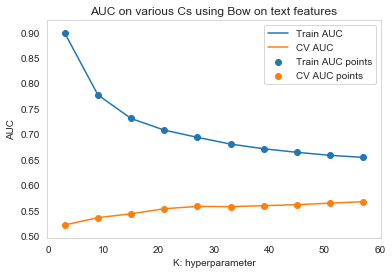

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.092733      0.012265        27.315941        1.225290   
1       0.097403      0.010216        28.485903        1.325895   
2       0.112414      0.035543        31.804312        2.213744   
3       0.084402      0.001691        27.339175        1.379230   
4       0.094737      0.003684        28.695361        1.089827   

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.523089   
1                 9   {'n_neighbors': 9}           0.532422   
2                15  {'n_neighbors': 15}           0.534396   
3                21  {'n_neighbors': 21}           0.547403   
4                27  {'n_neighbors': 27}           0.552186   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.516242           0.525217         0.521516        0.003829   
1           0.533335           0.541906         0.535887        0.

In [174]:
Train_data(train_bow,y_train,vectorizer="Bow")

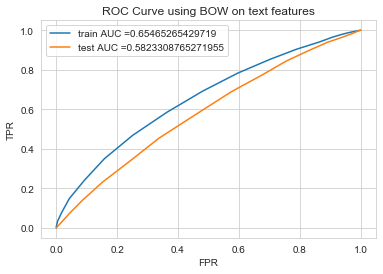

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.37241002199047213 for threshold 0.86
Train confusion matrix
[[    0  5168]
 [    0 28332]]


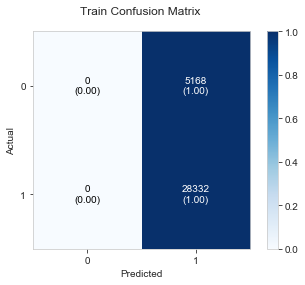

Test confusion matrix
[[    0  2546]
 [    0 13954]]


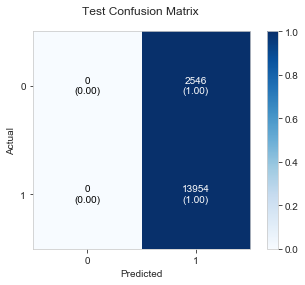

In [175]:
Test_Data(train_bow,y_train,test_bow,y_test,'brute', best_k=57,vectorizer="BOW")

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

The best parameters for using this model is {'n_neighbors': 57}


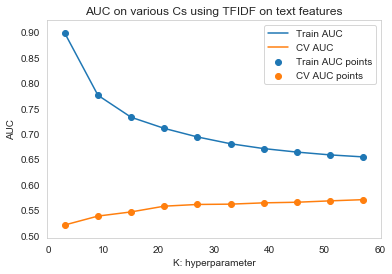

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.109746      0.013898        27.566801        2.474099   
1       0.112748      0.023813        27.696995        0.936600   
2       0.087731      0.000943        27.420103        1.023103   
3       0.083061      0.001415        27.070998        0.831749   
4       0.091732      0.013030        27.172976        1.015876   

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.522604   
1                 9   {'n_neighbors': 9}           0.538297   
2                15  {'n_neighbors': 15}           0.543062   
3                21  {'n_neighbors': 21}           0.550039   
4                27  {'n_neighbors': 27}           0.557107   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.513505           0.524691         0.520267        0.004856   
1           0.531864           0.543043         0.537735        0.

In [176]:
Train_data(train_tfidf,y_train,vectorizer="TFIDF")

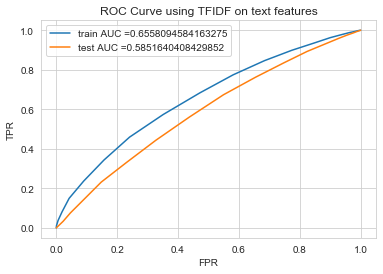

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.37219227135001215 for threshold 0.86
Train confusion matrix
[[    0  5168]
 [    0 28332]]


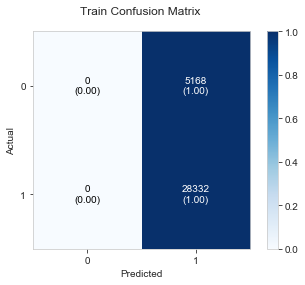

Test confusion matrix
[[    0  2546]
 [    0 13954]]


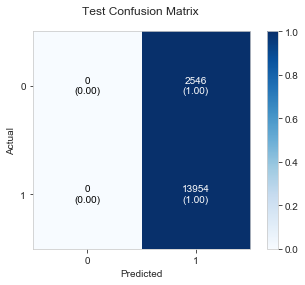

In [177]:
Test_Data(train_tfidf,y_train,test_tfidf,y_test,'brute', best_k=57,vectorizer="TFIDF")

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

The best parameters for using this model is {'n_neighbors': 57}


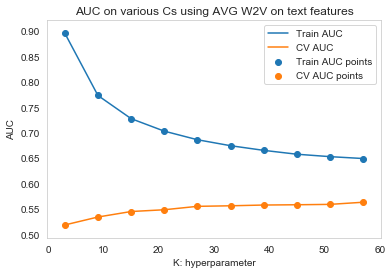

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.544258      0.104724       297.174844       35.454298   
1       0.448321      0.041169       255.791134       11.012292   
2       0.545392      0.014177       310.817646       13.179156   
3       0.494352      0.025683       306.252381       22.391102   
4       0.453658      0.020514       288.679326        6.870892   

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.517557   
1                 9   {'n_neighbors': 9}           0.537366   
2                15  {'n_neighbors': 15}           0.545213   
3                21  {'n_neighbors': 21}           0.550303   
4                27  {'n_neighbors': 27}           0.556278   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.515983           0.521290         0.518277        0.002226   
1           0.524676           0.539713         0.533918        0.

In [178]:
Train_data(train_avg,y_train,vectorizer="AVG W2V")

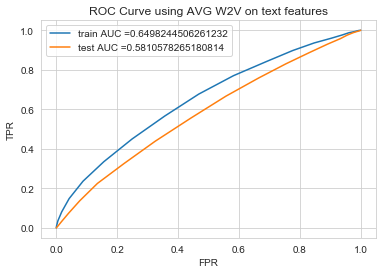

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3642886463642725 for threshold 0.86
Train confusion matrix
[[    0  5168]
 [    0 28332]]


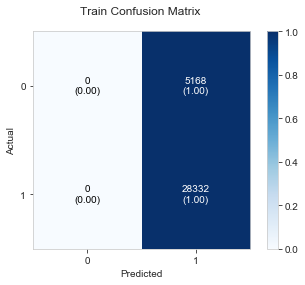

Test confusion matrix
[[    0  2546]
 [    0 13954]]


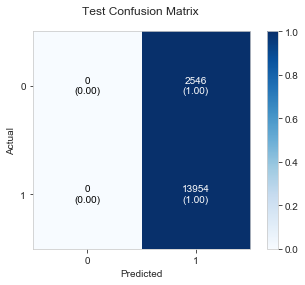

In [179]:
Test_Data(train_avg,y_train,test_avg,y_test,'brute', best_k=57,vectorizer="AVG W2V")

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

The best parameters for using this model is {'n_neighbors': 57}


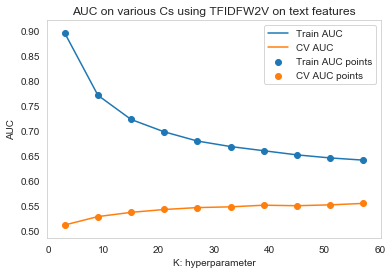

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009683      0.001239        19.548058        1.864679   
1       0.019014      0.010041        23.123373        0.111245   
2       0.011010      0.001634        23.825227        0.616467   
3       0.015013      0.002165        24.382332        0.231251   
4       0.015343      0.002869        24.395343        0.031295   

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.511842   
1                 9   {'n_neighbors': 9}           0.530630   
2                15  {'n_neighbors': 15}           0.535664   
3                21  {'n_neighbors': 21}           0.540204   
4                27  {'n_neighbors': 27}           0.545595   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.509374           0.512819         0.511345        0.001450   
1           0.523648           0.530003         0.528094        0.

In [180]:
# Please write all the code with proper documentation
Train_data(train_tfidf_avg,y_train,vectorizer="TFIDFW2V")

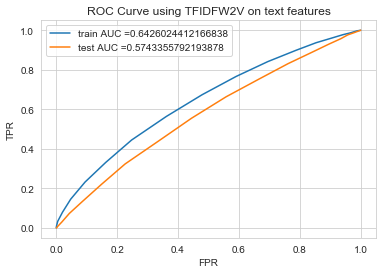

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3600280880090951 for threshold 0.86
Train confusion matrix
[[    0  5168]
 [    0 28332]]


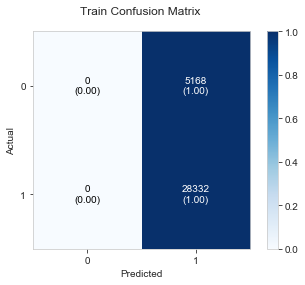

Test confusion matrix
[[    0  2546]
 [    0 13954]]


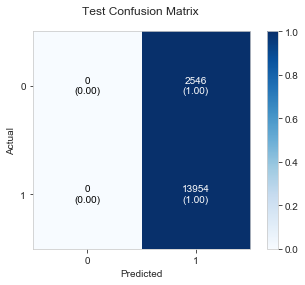

In [181]:
Test_Data(train_tfidf_avg,y_train,test_tfidf_avg,y_test,'brute', best_k=57,vectorizer="TFIDFW2V")

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [182]:
#chi2 scoring function gave error input X should be non negative, fixed it by using f_classif by following the below reference
#https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection/341352
#https://stackoverflow.com/questions/46927545/get-feature-names-of-selectkbest-function-python
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=2000).fit(train_tfidf, y_train)

train_new = selector.transform(train_tfidf)
#cv_new = selector.transform(cv_tfidf)
test_new = selector.transform(test_tfidf)

print(train_new.shape)

(33500, 2000)


The best parameters for using this model is {'n_neighbors': 57}


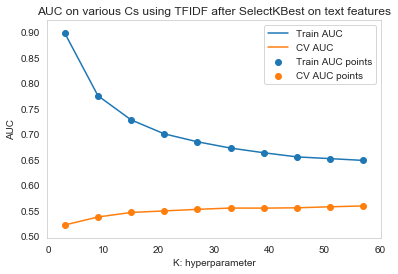

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.049036      0.007262        21.411220        0.248305   
1       0.048036      0.005358        23.162620        0.354285   
2       0.042032      0.003266        22.644746        0.295130   
3       0.041364      0.003093        21.977983        0.315264   
4       0.041029      0.004970        21.878924        0.318696   

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.519209   
1                 9   {'n_neighbors': 9}           0.536568   
2                15  {'n_neighbors': 15}           0.549049   
3                21  {'n_neighbors': 21}           0.548406   
4                27  {'n_neighbors': 27}           0.543496   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.515427           0.528256         0.520964        0.005383   
1           0.529857           0.543321         0.536582        0.

In [183]:
Train_data(train_new,y_train,vectorizer="TFIDF after SelectKBest")

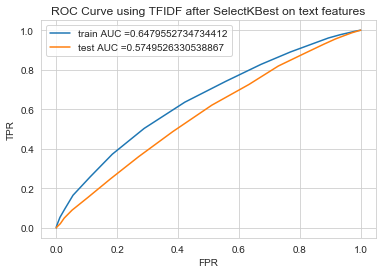

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3675098232632182 for threshold 0.842
Train confusion matrix
[[    0  5168]
 [    0 28332]]


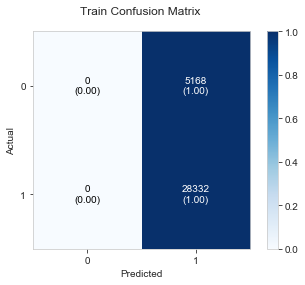

Test confusion matrix
[[    0  2546]
 [    0 13954]]


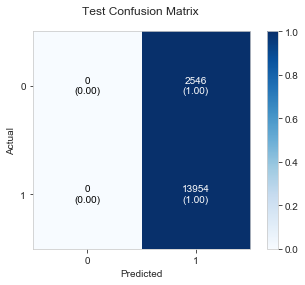

In [184]:
Test_Data(train_new,y_train,test_new,y_test,'brute', best_k=57,vectorizer="TFIDF after SelectKBest")

<h1>3. Conclusions</h1>

In [185]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+-------------------------+-------+-----------------+--------------------+
|        Vectorizer       | Model | Hyper parameter |        AUC         |
+-------------------------+-------+-----------------+--------------------+
|           BOW           | brute |        57       | 0.5823308765271955 |
|          TFIDF          | brute |        57       | 0.5851640408429852 |
|         AVG W2V         | brute |        57       | 0.5810578265180814 |
|         TFIDFW2V        | brute |        57       | 0.5743355792193878 |
| TFIDF after SelectKBest | brute |        57       | 0.5749526330538867 |
+-------------------------+-------+-----------------+--------------------+


1. The above results show, KNN is not able to seperate positve and negative texts very clearly even with different hyperparameter values. We should try other algorithms    
2. Auc of top 2000 features is also almost closer to TFIDF with all features    
3. In order to avoid overfitting the training data I avoided using K=1. As per theory as K increases model starts to underfit  
4. The dataset  is imbalanced, we havnt used undersampling or oversampling, that may also have contributed for the conflicting specificity and sensitivity    
5. We can also conclude that the words used in title of approved and rejected projects looks almost same